In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
%matplotlib inline

In [3]:
df = pd.read_excel('WTI.xlsx',sheetname='2017')

In [4]:
df.describe()

,Price,Qty
count,13.000000,13.000000
mean,51.422308,139.425066
std,4.134342,103.540970
min,45.180000,22.000000
25%,48.480000,53.000000
50%,51.060000,91.000000
75%,53.470000,256.000000
max,57.880000,291.525863


In [7]:
df.head()

,Price,Qty
0,52.50,59.0
1,53.47,267.0
2,49.33,49.0
3,51.06,22.0
4,48.48,91.0


In [11]:
standard = preprocessing.StandardScaler().fit(df)
standard_Transformed = standard.transform(df)
standard_Transformed

array([[ 0.27131225, -0.80846319],
       [ 0.51551265,  1.28243149],
       [-0.5267447 , -0.90898697],
       [-0.09121204, -1.18040119],
       [-0.74073474, -0.48678709],
       [-1.57151959, -1.08992978],
       [-1.20647776, -0.82856795],
       [-0.85150605, -0.86877746],
       [-0.40338574,  0.52850312],
       [ 0.03969951,  0.47824123],
       [ 1.31356961,  1.18190771],
       [ 1.62574331,  1.17185533],
       [ 1.62574331,  1.52897474]])

In [25]:
reshaped

array([[ 0.27131225],
       [-0.80846319],
       [ 0.51551265],
       [ 1.28243149],
       [-0.5267447 ],
       [-0.90898697],
       [-0.09121204],
       [-1.18040119],
       [-0.74073474],
       [-0.48678709],
       [-1.57151959],
       [-1.08992978],
       [-1.20647776],
       [-0.82856795],
       [-0.85150605],
       [-0.86877746],
       [-0.40338574],
       [ 0.52850312],
       [ 0.03969951],
       [ 0.47824123],
       [ 1.31356961],
       [ 1.18190771],
       [ 1.62574331],
       [ 1.17185533],
       [ 1.62574331],
       [ 1.52897474]])

In [26]:
x=reshaped[:,0]

In [ ]:
np.std(x[:,0])

In [27]:
y=df['Qty']

In [28]:
y = standard_Transformed[:,1]

In [29]:
#Train Test Split
from sklearn.model_selection import train_test_split

In [30]:
#This is using tuple unpacking to grab the training set and testing set
#Test size is the percentage of the dataset that is allocated to the test. 30% is common
#Random_state ensure random split on the data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.7, random_state=0)

ValueError: Found input variables with inconsistent numbers of samples: [26, 13]

In [18]:
#Create and Train the Model
from sklearn.linear_model import LinearRegression

In [19]:
lm = LinearRegression()

In [22]:
lm.fit(X_train,y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[ 0.27131225 -1.57151959  1.62574331].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [23]:
reshaped = standard_Transformed.reshape(-1,1)

In [35]:
print(lm.intercept_)

-884.38062641


In [36]:
# Predicting the Test set results
y_pred = lm.predict(X_test)
y_pred

array([  31.02202295,  251.8729731 ,   67.33973475,  227.53029059,
         84.02625099,   93.64553682])

In [29]:
lm.coef_

array([ 21.04184796])

In [37]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.72165917457118356

In [16]:
X_train.columns

Index(['Price'], dtype='object')

In [17]:
cdf = pd.DataFrame(lm.coef_,x.columns,columns=['Coeff'])

In [18]:
cdf

,Coeff
Price,18.810744


In [20]:
predictions = lm.predict(X_test)

In [21]:
predictions

array([ 130.69355516,  139.91081982,  173.0177296 ,  114.7044226 ,
        190.32361426,  268.20009523,  163.23614262,   52.62896675,
        106.42769515])

In [22]:
y_test

2      49
8     192
9     187
4      91
0      59
10    257
3      22
5      31
7      53
Name: Qty, dtype: int64

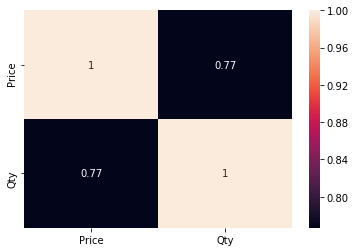

In [24]:
sns.heatmap(df.corr(),annot=True)